In [8]:
import numpy as np
import torch
from OkadaTorch import DC3D0, DC3D
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 20

var_list = [
    "ux", "uy", "uz", "uxx", "uyx", "uzx", "uxy", "uyy", "uzy", "uxz", "uyz", "uzz"
]

# `DC3D0` (single station)

In [9]:
ALPHA = 2.0/3.0
X = torch.tensor(0.5)
Y = torch.tensor(-0.5)
Z = torch.tensor(-0.1)

DEPTH = 2.0
DIP = torch.tensor(45.0)

POT1, POT2, POT3, POT4 = 4.0, 3.0, 0.0, 0.0

out, IRET = DC3D0(ALPHA, X, Y, Z, DEPTH, DIP, POT1, POT2, POT3, POT4, compute_strain=True, is_degree=True)
out

[tensor(0.0624),
 tensor(-0.0456),
 tensor(0.2197),
 tensor(0.0927),
 tensor(-0.0199),
 tensor(0.0337),
 tensor(0.0207),
 tensor(0.0565),
 tensor(0.1269),
 tensor(-0.0452),
 tensor(-0.0738),
 tensor(-0.0531)]

In [10]:
IRET

tensor(0, dtype=torch.int32)

# `DC3D0` (multiple stations)

In [11]:
ALPHA = 2.0/3.0
x = np.linspace(-1, 1, 101)
y = np.linspace(-1, 1, 101)
z = np.linspace(-1, 0, 51)
X, Y, Z = np.meshgrid(x, y, z)
X = torch.from_numpy(X)
Y = torch.from_numpy(Y)
Z = torch.from_numpy(Z)

DEPTH = 2.0
DIP = torch.tensor(45.0)

POT1, POT2, POT3, POT4 = 4.0, 3.0, 0.0, 0.0

out, IRET = DC3D0(ALPHA, X, Y, Z, DEPTH, DIP, POT1, POT2, POT3, POT4, compute_strain=True, is_degree=True)

In [12]:
out

[tensor([[[ 0.1017,  0.0994,  0.0971,  ...,  0.0205,  0.0193,  0.0181],
          [ 0.1021,  0.0997,  0.0974,  ...,  0.0198,  0.0185,  0.0172],
          [ 0.1023,  0.0999,  0.0976,  ...,  0.0190,  0.0177,  0.0163],
          ...,
          [ 0.1019,  0.1010,  0.1000,  ...,  0.0765,  0.0770,  0.0775],
          [ 0.1016,  0.1008,  0.0999,  ...,  0.0776,  0.0781,  0.0787],
          [ 0.1014,  0.1005,  0.0996,  ...,  0.0786,  0.0792,  0.0798]],
 
         [[ 0.1028,  0.1004,  0.0981,  ...,  0.0202,  0.0190,  0.0177],
          [ 0.1032,  0.1007,  0.0984,  ...,  0.0195,  0.0181,  0.0168],
          [ 0.1035,  0.1010,  0.0986,  ...,  0.0187,  0.0173,  0.0160],
          ...,
          [ 0.1042,  0.1032,  0.1022,  ...,  0.0776,  0.0781,  0.0787],
          [ 0.1039,  0.1030,  0.1020,  ...,  0.0787,  0.0792,  0.0799],
          [ 0.1036,  0.1027,  0.1018,  ...,  0.0797,  0.0803,  0.0810]],
 
         [[ 0.1039,  0.1014,  0.0990,  ...,  0.0199,  0.0186,  0.0173],
          [ 0.1043,  0.1018,

In [13]:
IRET.sum()

tensor(0)

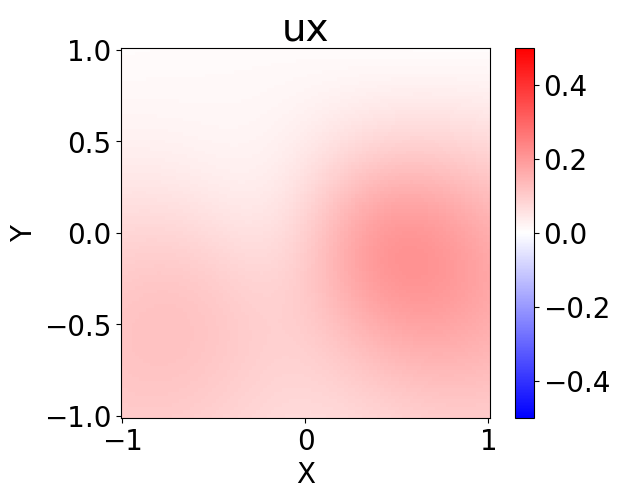

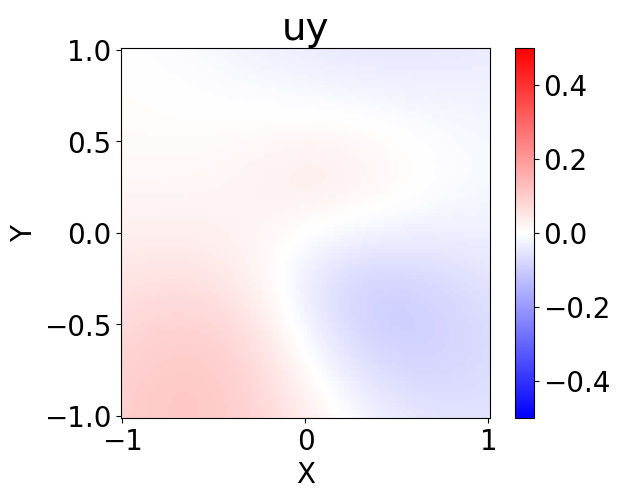

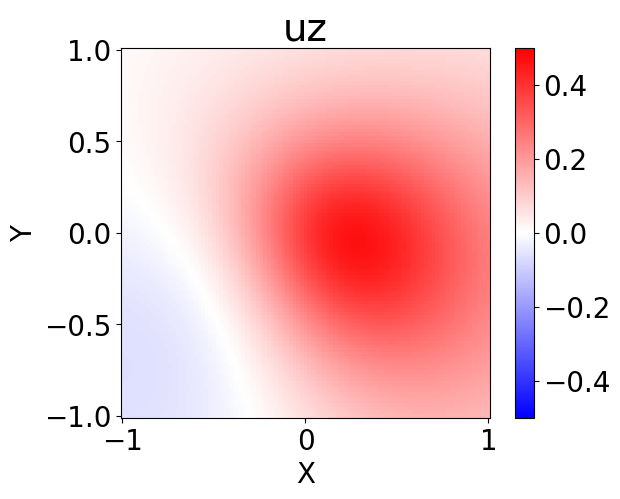

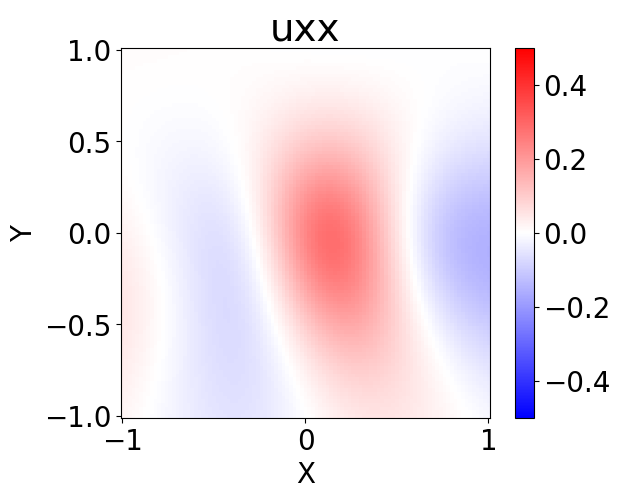

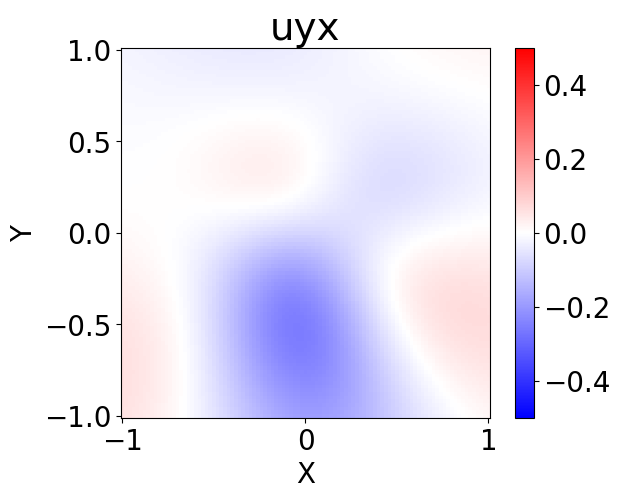

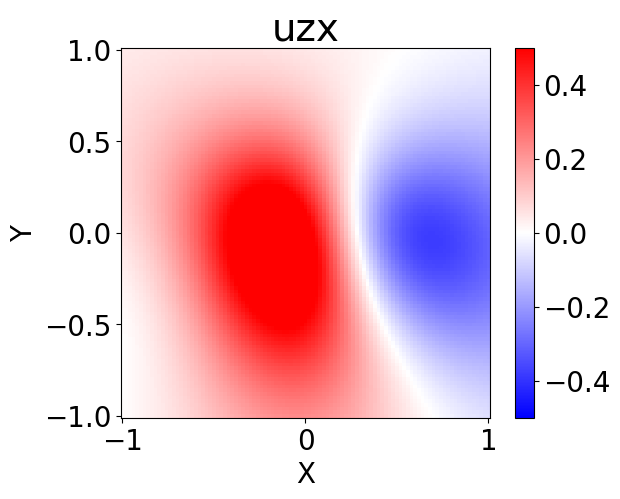

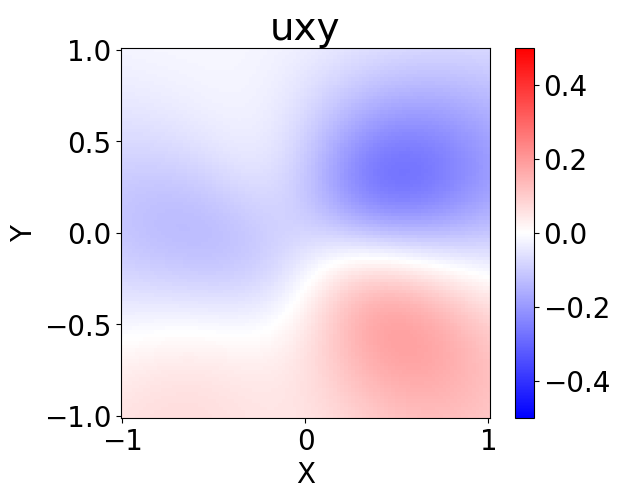

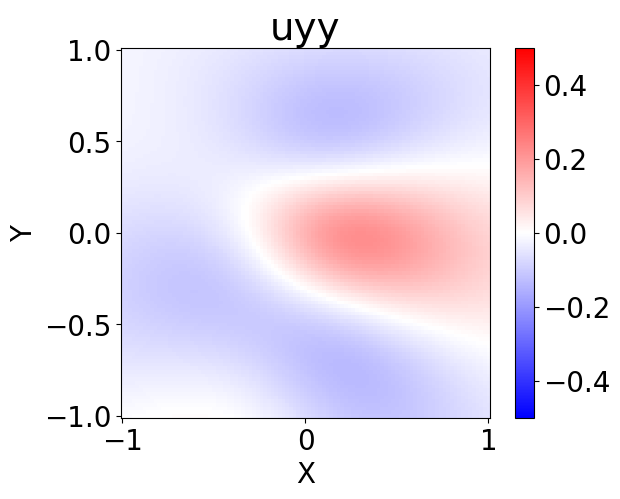

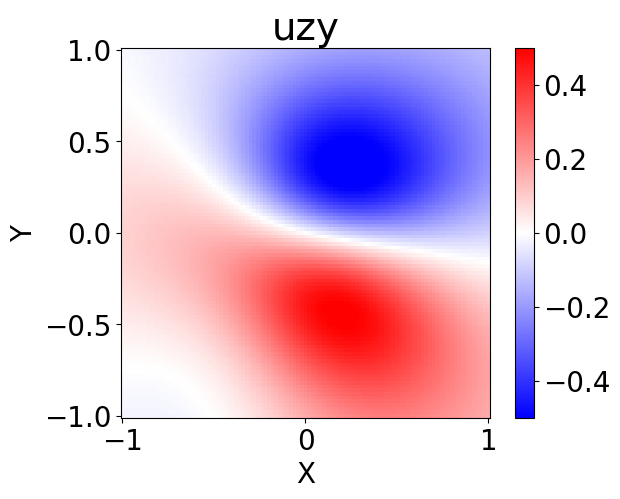

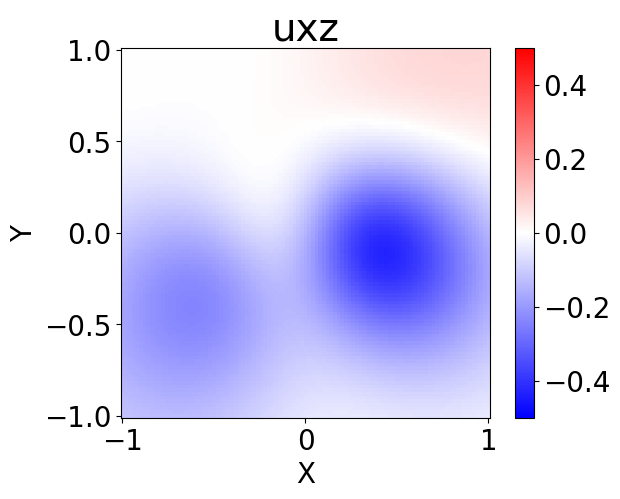

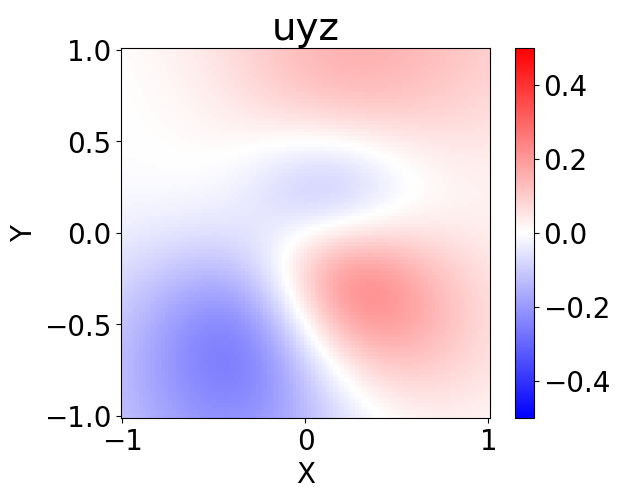

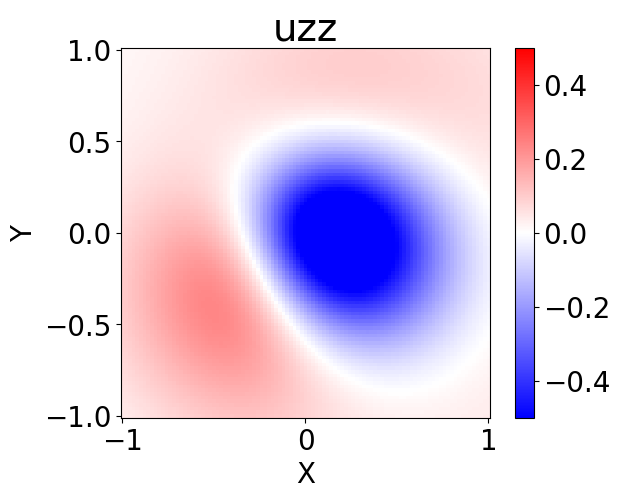

In [14]:
for i, var in enumerate(var_list):

    fig, ax = plt.subplots()
    im = ax.pcolormesh(X[:,:,0], Y[:,:,0], out[i][:,:,0].detach().numpy(), cmap="bwr", vmin=-0.5, vmax=0.5)
    ax.set_aspect("equal")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(var, fontsize=28)
    fig.colorbar(im)
    fig.show()

# `DC3D` (single station)

In [15]:
ALPHA = 2.0/3.0
X = torch.tensor(0.5)
Y = torch.tensor(-0.5)
Z = torch.tensor(-0.1)

DEPTH = 2.0
DIP = torch.tensor(45.0)
AL1, AL2 = -0.2, 0.2
AW1, AW2 = -0.1, 0.1

DISL1, DISL2, DISL3 = 4.0, 3.0, 0.0

out, IRET = DC3D(ALPHA, X, Y, Z, DEPTH, DIP, AL1, AL2, AW1, AW2, DISL1, DISL2, DISL3, compute_strain=True, is_degree=True)
out

[tensor(0.0050),
 tensor(-0.0036),
 tensor(0.0174),
 tensor(0.0072),
 tensor(-0.0016),
 tensor(0.0028),
 tensor(0.0016),
 tensor(0.0044),
 tensor(0.0101),
 tensor(-0.0036),
 tensor(-0.0059),
 tensor(-0.0041)]

In [16]:
IRET

tensor(0, dtype=torch.int32)

# `DC3D` (multiple stations)

In [17]:
ALPHA = 2.0/3.0
x = np.linspace(-1, 1, 101)
y = np.linspace(-1, 1, 101)
z = np.linspace(-1, 0, 51)
X, Y, Z = np.meshgrid(x, y, z)
X = torch.from_numpy(X)
Y = torch.from_numpy(Y)
Z = torch.from_numpy(Z)

DEPTH = 2.0
DIP = torch.tensor(45.0)
AL1, AL2 = -0.2, 0.2
AW1, AW2 = -0.1, 0.1

DISL1, DISL2, DISL3 = 4.0, 3.0, 0.0

out, IRET = DC3D(ALPHA, X, Y, Z, DEPTH, DIP, AL1, AL2, AW1, AW2, DISL1, DISL2, DISL3, compute_strain=True, is_degree=True)

In [18]:
out

[tensor([[[ 0.0081,  0.0079,  0.0077,  ...,  0.0016,  0.0015,  0.0014],
          [ 0.0081,  0.0079,  0.0077,  ...,  0.0016,  0.0015,  0.0014],
          [ 0.0081,  0.0079,  0.0077,  ...,  0.0015,  0.0014,  0.0013],
          ...,
          [ 0.0081,  0.0080,  0.0079,  ...,  0.0061,  0.0061,  0.0061],
          [ 0.0081,  0.0080,  0.0079,  ...,  0.0062,  0.0062,  0.0062],
          [ 0.0080,  0.0080,  0.0079,  ...,  0.0062,  0.0063,  0.0063]],
 
         [[ 0.0081,  0.0080,  0.0078,  ...,  0.0016,  0.0015,  0.0014],
          [ 0.0082,  0.0080,  0.0078,  ...,  0.0016,  0.0015,  0.0013],
          [ 0.0082,  0.0080,  0.0078,  ...,  0.0015,  0.0014,  0.0013],
          ...,
          [ 0.0083,  0.0082,  0.0081,  ...,  0.0062,  0.0062,  0.0062],
          [ 0.0082,  0.0082,  0.0081,  ...,  0.0062,  0.0063,  0.0063],
          [ 0.0082,  0.0081,  0.0081,  ...,  0.0063,  0.0064,  0.0064]],
 
         [[ 0.0082,  0.0080,  0.0078,  ...,  0.0016,  0.0015,  0.0014],
          [ 0.0083,  0.0081,

In [19]:
IRET.sum()

tensor(0)

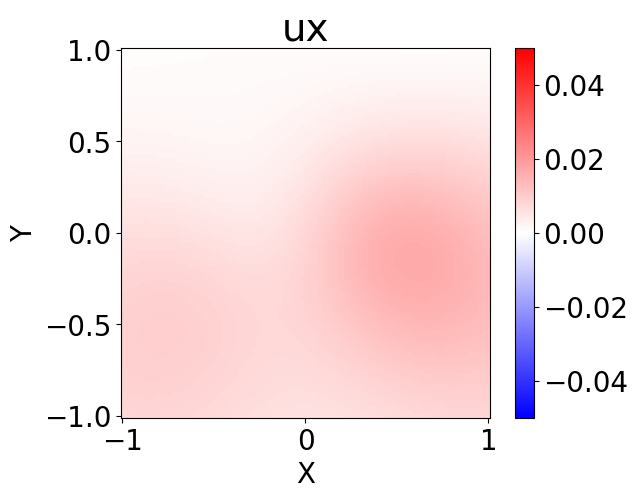

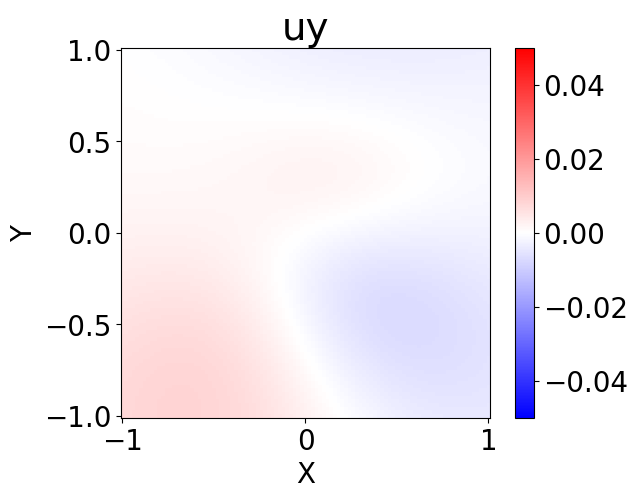

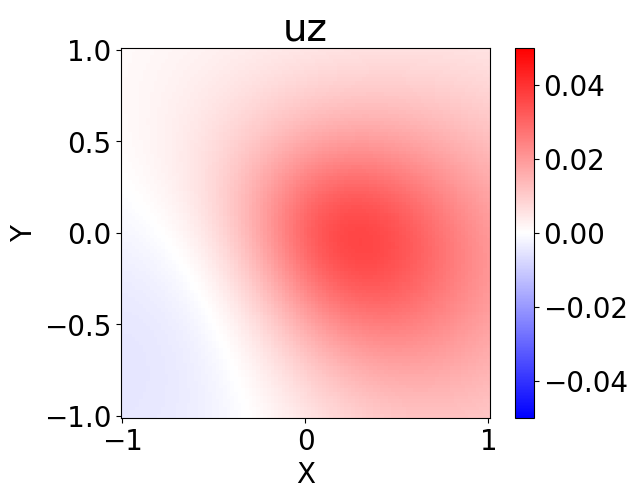

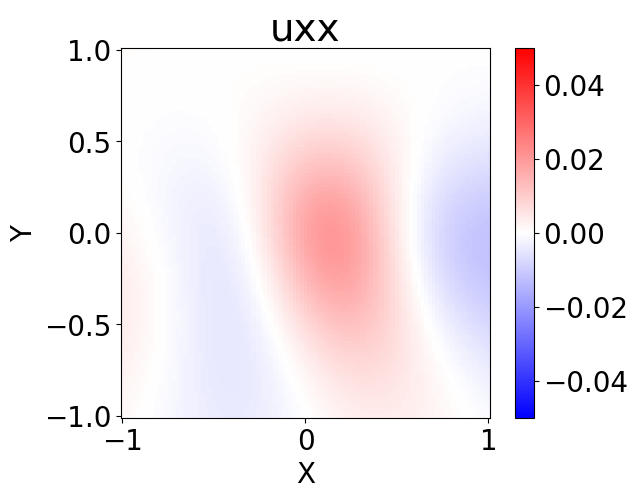

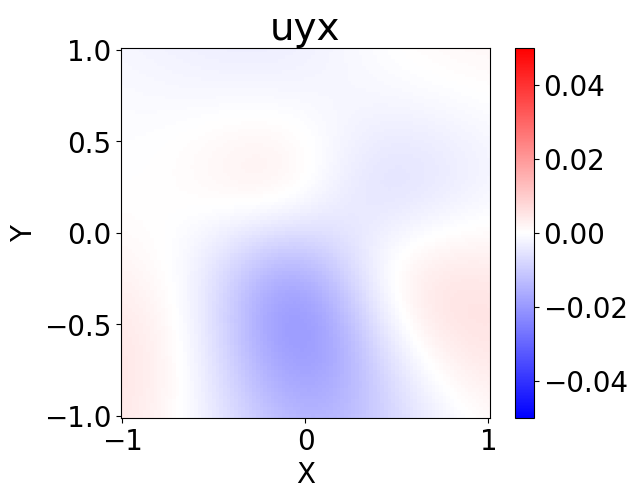

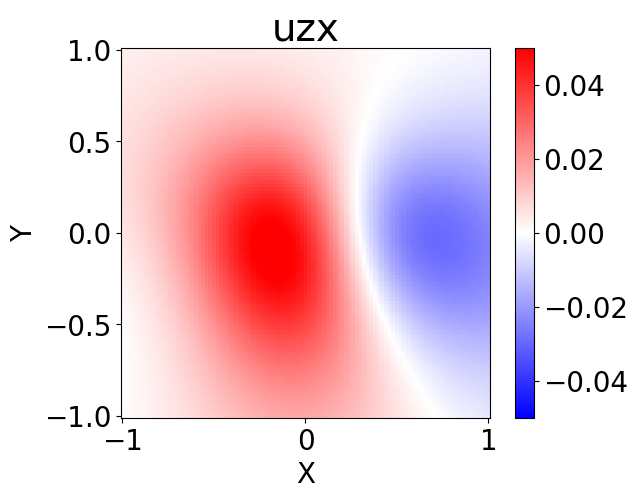

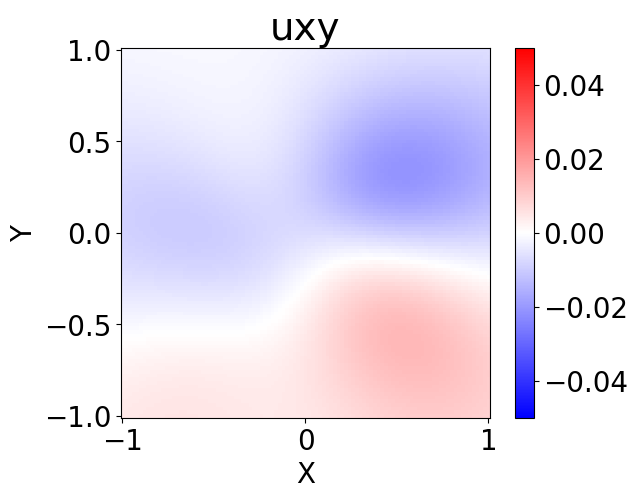

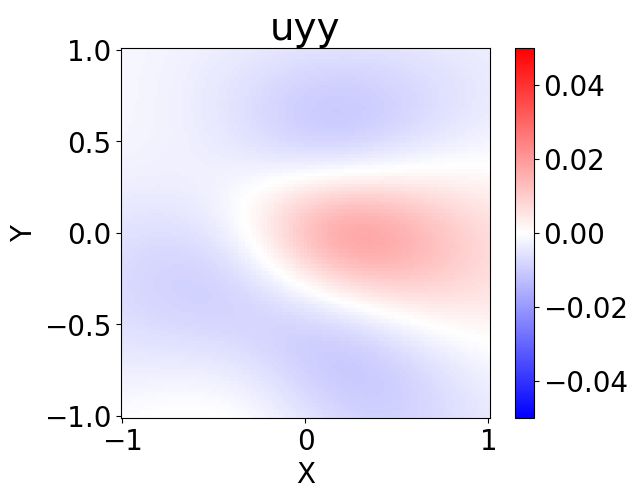

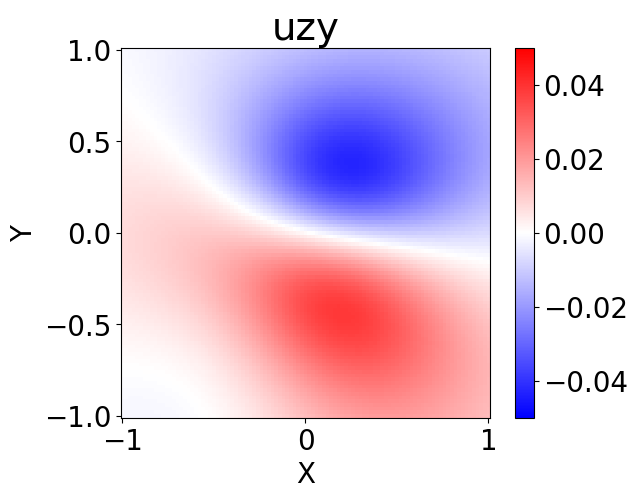

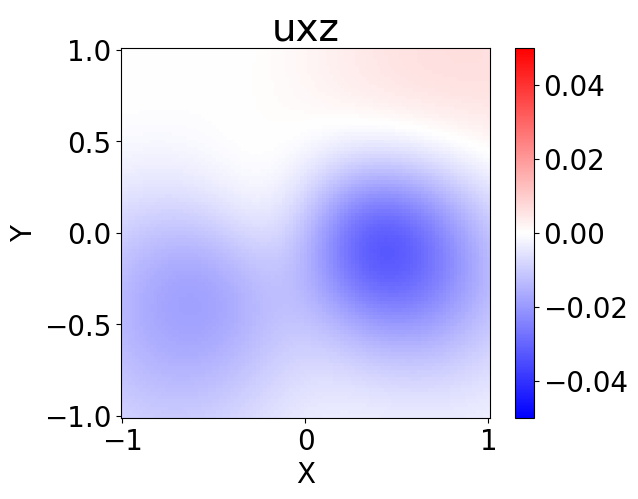

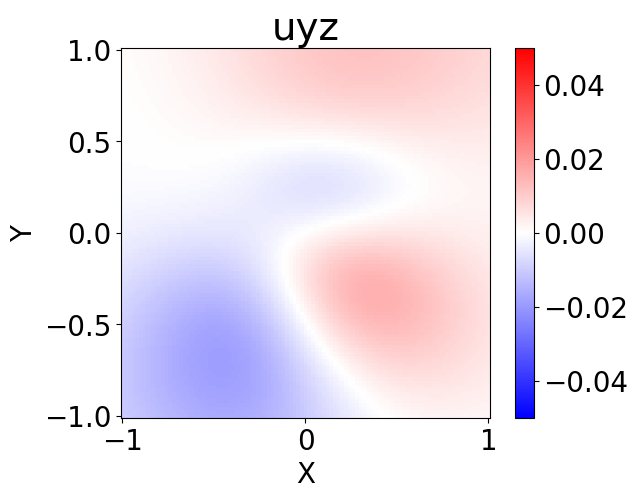

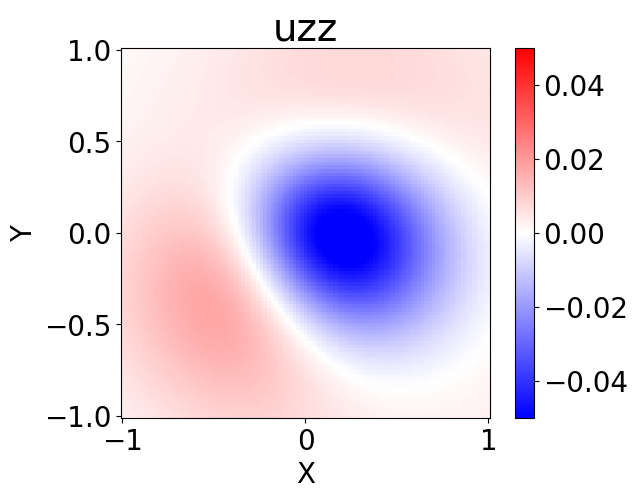

In [20]:
for i, var in enumerate(var_list):

    fig, ax = plt.subplots()
    im = ax.pcolormesh(X[:,:,0], Y[:,:,0], out[i][:,:,0].detach().numpy(), cmap="bwr", vmin=-0.05, vmax=0.05)
    ax.set_aspect("equal")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(var, fontsize=28)
    fig.colorbar(im)
    fig.show()

# `okada_wrapper`-like functions

In [21]:
from numpy import linspace, log, meshgrid
from matplotlib.pyplot import contourf, contour, \
    xlabel, ylabel, colorbar, show, savefig
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.linewidth'] = 1

In [22]:
import torch
from OkadaTorch import DC3D0, DC3D


def dc3d0wrapper(alpha, xo, depth, dip, potency):
    out, IRET = \
    DC3D0(alpha, xo[0], xo[1], xo[2], depth, dip, 
          potency[0], potency[1], potency[2], potency[3], compute_strain=True, is_degree=True)
    return IRET, out[:3], out[3:]

def dc3dwrapper(alpha, xo, depth, dip, strike_width, dip_width, dislocation):
    out, IRET = \
    DC3D(alpha, xo[0], xo[1], xo[2], depth, dip, 
         strike_width[0], strike_width[1], dip_width[0], dip_width[1],
         dislocation[0], dislocation[1], dislocation[2], compute_strain=True, is_degree=True)
    return IRET, out[:3], out[3:]

In [23]:
def get_params():
    source_depth = 3.0
    obs_depth = 3.0
    poisson_ratio = 0.25
    mu = 1.0
    dip = 90
    lmda = 2 * mu * poisson_ratio / (1 - 2 * poisson_ratio)
    alpha = (lmda + mu) / (lmda + 2 * mu)
    return source_depth, obs_depth, poisson_ratio, mu, dip, alpha

/tmp/ipykernel_217827/780293048.py:17: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  cntrf = contourf(x, y, log(abs(ux)))
/tmp/ipykernel_217827/780293048.py:18: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  contour(x, y, log(abs(ux)), colors='k', linestyles='solid')


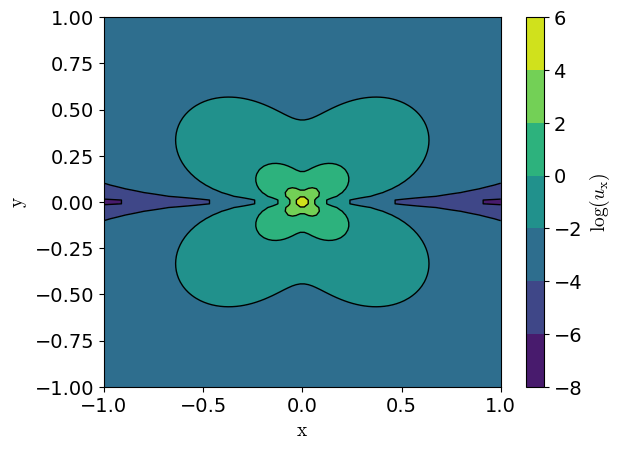

In [24]:
def test_dc3d0():
    source_depth, obs_depth, poisson_ratio, mu, dip, alpha = get_params()
    n = (100, 100)
    x = linspace(-1, 1, n[0])
    y = linspace(-1, 1, n[1])
    X, Y = meshgrid(x, y)
    X = torch.from_numpy(X)
    Y = torch.from_numpy(Y)

    success, u, grad_u = dc3d0wrapper(alpha, 
                                      [X, Y, torch.tensor(-obs_depth)], 
                                      source_depth, torch.tensor(dip), 
                                      [1.0, 0.0, 0.0, 0.0])
    
    ux = u[0]

    cntrf = contourf(x, y, log(abs(ux)))
    contour(x, y, log(abs(ux)), colors='k', linestyles='solid')
    xlabel(r'$\mathrm{x}$')
    ylabel(r'$\mathrm{y}$')
    cbar = colorbar(cntrf)
    cbar.set_label(r'$\log(u_{\mathrm{x}})$')
    show()

test_dc3d0()

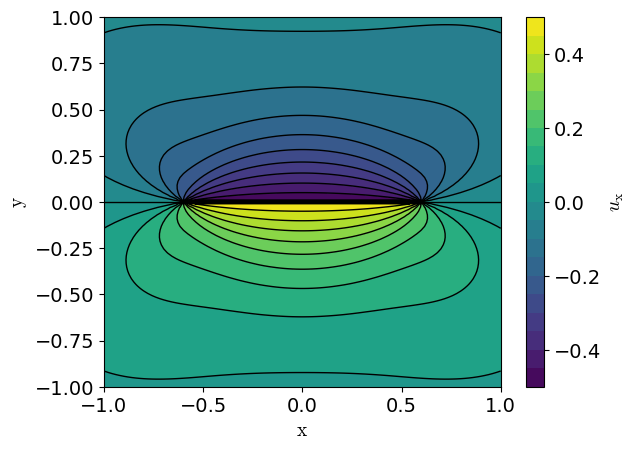

In [25]:
def test_dc3d():
    source_depth, obs_depth, poisson_ratio, mu, dip, alpha = get_params()
    n = (100, 100)
    x = linspace(-1, 1, n[0])
    y = linspace(-1, 1, n[1])
    X, Y = meshgrid(x, y)
    X = torch.from_numpy(X)
    Y = torch.from_numpy(Y)

    success, u, grad_u = dc3dwrapper(alpha, 
                                     [X, Y, torch.tensor(-obs_depth)],
                                     source_depth, torch.tensor(dip),
                                     [-0.6, 0.6], [-0.6, 0.6],
                                     [1.0, 0.0, 0.0])

    ux = u[0]

    levels = linspace(-0.5, 0.5, 21)
    cntrf = contourf(x, y, ux, levels=levels)
    contour(x, y, ux, colors='k', levels=levels, linestyles='solid')
    xlabel(r'$\mathrm{x}$')
    ylabel(r'$\mathrm{y}$')
    cbar = colorbar(cntrf)
    tick_locator = matplotlib.ticker.MaxNLocator(nbins=5)
    cbar.locator = tick_locator
    cbar.update_ticks()
    cbar.set_label(r'$u_{\mathrm{x}}$')
    show()

test_dc3d()